In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import random

# Exercise 2

## (a) Represent the interest pattern by using a simple bipartite graph.

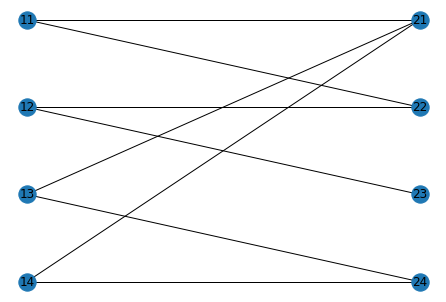

In [2]:
G = nx.Graph()

G.add_edges_from([(11,21),(11,22),(12,22),(12,23),(13,21),(13,24),(14,21),(14,21),(14,24)])

pos = {11:[0,3], 12:[0,2], 13:[0,1], 14:[0,0], 21:[1,3], 22:[1,2], 23:[1,1], 24:[1,0]}
       
nx.draw(G, pos, with_labels=True)
# plt.savefig("2a.eps",format='eps')

In [3]:
from networkx.algorithms.matching import maximal_matching

In [4]:
# naive way does not work
maximal_matching(G)

{(11, 21), (13, 24), (22, 12)}

## (b) Exploit max-flow problems to establish whether there exists a perfect matching that assigns to every person a book of interest. If a perfect matching exists, find at least a perfect matching. 

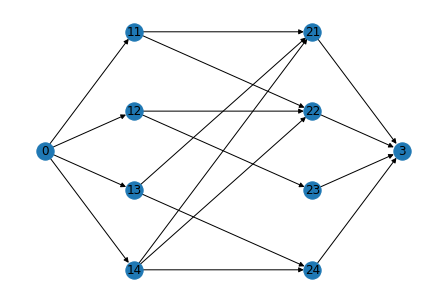

In [5]:
G1 = nx.DiGraph()

G1.add_edges_from([(0,11),(0,12),(0,13),(0,14)], capacity= 1)

G1.add_edges_from([(11,21),(11,22),(12,22),(12,23),(13,21),(13,24),(14,21),(14,22),(14,24)], capacity= 1)

G1.add_edges_from([(21,3),(22,3),(23,3),(24,3)], capacity= 1)

pos = {11:[0,3], 12:[0,2], 13:[0,1], 14:[0,0], 21:[1,3], 22:[1,2], 23:[1,1], 24:[1,0], 0:[-0.5,1.5], 3:[1.5,1.5]}

nx.draw(G1, pos, with_labels=True)
# plt.savefig("2b.eps",format='eps')

In [6]:
edges_list = list(G1.edges())

In [7]:
c = np.ones(len(edges_list), dtype=int) # capacity

In [8]:
edge_labels = {edges_list[i]: str(c[i]) for i in range(len(edges_list))}

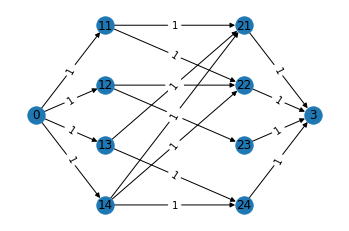

In [9]:
nx.draw_networkx_edge_labels(G1,pos, edge_labels=edge_labels)
nx.draw(G1, pos, with_labels=True)
# plt.savefig("2b2.eps",format='eps')

In [10]:
from networkx.algorithms.flow import maximum_flow 
from networkx.algorithms.flow import minimum_cut

In [11]:
max_flow = maximum_flow(G1,0,3)
max_flow

(4,
 {0: {11: 1, 12: 1, 13: 1, 14: 1},
  11: {21: 0, 22: 1},
  12: {22: 0, 23: 1},
  13: {21: 1, 24: 0},
  14: {21: 0, 22: 0, 24: 1},
  21: {3: 1},
  22: {3: 1},
  23: {3: 1},
  24: {3: 1},
  3: {}})

In [12]:
def show_flow(G1, max_flow, name = 'noname'):
    '''
    G1: graph
    name = noname: name of the graph (for saving)
    '''
    for u,v in G1.edges():
        G1[u][v]['color'] = 'black'
        G1[u][v]['weight'] = 1
    for key, value in max_flow[1].items():
        for key2, value2 in value.items():
            if value2 > 0:
#                 print(key, key2, value2)
                G1[key][key2]['color'] = 'red'
                G1[key][key2]['weight'] = value2
    colors = [G1[u][v]['color'] for u,v in G1.edges()]
    weights = [G1[u][v]['weight'] for u,v in G1.edges()]

    nx.draw(G1, pos, with_labels = True, edge_color=colors, width=weights)
#     plt.savefig(name+".eps",format='eps')

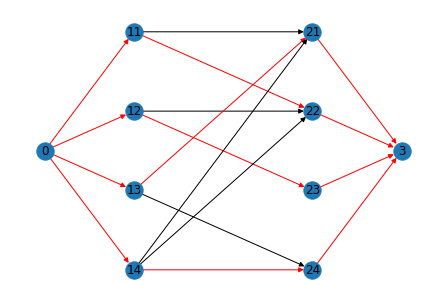

In [13]:
show_flow(G1,max_flow, "2b3")

## (c) Assume now that there are multiple copies of book, specifically the distribution of the number of copies is (2, 3, 2, 2), and there is no constraint on the number of books that each person can take. The only constraint is that each person can not take more copies of the same book. Use the analogy with max-flow problems to establish how many books of interest can be assigned in total.

In [14]:
c = [2,3,2,2]
# function to set capacities based on array.
def set_capacities(G, c):
    nx.set_edge_attributes(G, 
                       {(0, 11): {"capacity": 4}, 
                        (0, 12): {"capacity": 4}, 
                        (0, 13): {"capacity": 4},
                        (0, 14): {"capacity": 4},
                           
                        (21, 3): {"capacity": c[0]}, 
                        (22, 3): {"capacity": c[1]}, 
                        (23, 3): {"capacity": c[2]},
                        (24, 3): {"capacity": c[3]}})
set_capacities(G1, c)

In [15]:
c = [G1.get_edge_data(u,v)['capacity'] for u,v in G1.edges()] # get current capacities

In [16]:
edge_labels = {edges_list[i]: str(c[i]) for i in range(len(edges_list))}

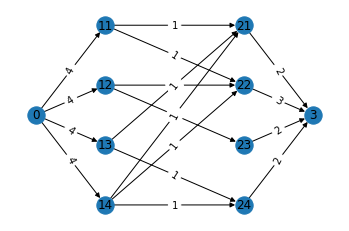

In [17]:
nx.draw_networkx_edge_labels(G1,pos, edge_labels=edge_labels)
nx.draw(G1, pos, with_labels=True)
# plt.savefig("2c.eps",format='eps')

In [18]:
max_flow = maximum_flow(G1,0,3)
max_flow

(8,
 {0: {11: 1, 12: 2, 13: 2, 14: 3},
  11: {21: 0, 22: 1},
  12: {22: 1, 23: 1},
  13: {21: 1, 24: 1},
  14: {21: 1, 22: 1, 24: 1},
  21: {3: 2},
  22: {3: 3},
  23: {3: 1},
  24: {3: 2},
  3: {}})

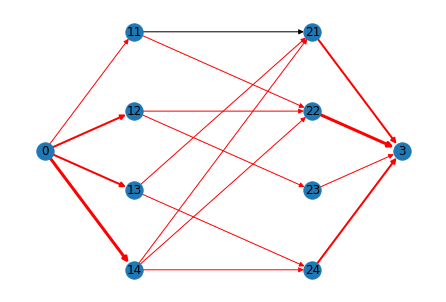

In [19]:
show_flow(G1, max_flow, "2c2")

## (d) Starting from point (c), suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?

In [20]:
c = [2,3,2,2]

In [21]:
max_sell_buy = 1
for i in range(4):
    for j in range(4):
        if (i!=j): # do not sell and buy the same book
            
            cc = c.copy()
            cc[i] = cc[i] - 1 # sell 
            cc[j] = cc[j] + 1 # buy
            #print(cc)
            
            
            
            set_capacities(G1, cc)
            # memorize the max 
            m_flow = maximum_flow(G1,0,3)[0]
            if m_flow > max_sell_buy:
                max_sell_buy = m_flow
                max_i = i+1
                max_j = j+1
                max_c = cc
                mm_flow = maximum_flow(G1,0,3)
                
            print(cc, m_flow)
print("Max flow can be obtained if we sell ", max_i, " and buy ", max_j, " with flow ", max_sell_buy, "(", max_c, ")")

[1, 4, 2, 2] 7
[1, 3, 3, 2] 7
[1, 3, 2, 3] 7
[3, 2, 2, 2] 8
[2, 2, 3, 2] 7
[2, 2, 2, 3] 7
[3, 3, 1, 2] 9
[2, 4, 1, 2] 8
[2, 3, 1, 3] 8
[3, 3, 2, 1] 8
[2, 4, 2, 1] 7
[2, 3, 3, 1] 7
Max flow can be obtained if we sell  3  and buy  1  with flow  9 ( [3, 3, 1, 2] )


In [22]:
mm_flow

(9,
 {0: {11: 2, 12: 2, 13: 2, 14: 3},
  11: {21: 1, 22: 1},
  12: {22: 1, 23: 1},
  13: {21: 1, 24: 1},
  14: {21: 1, 22: 1, 24: 1},
  21: {3: 3},
  22: {3: 3},
  23: {3: 1},
  24: {3: 2},
  3: {}})

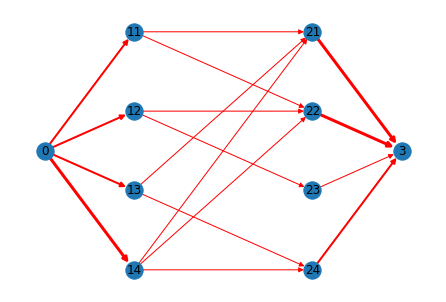

In [23]:
c = max_c
show_flow(G1, mm_flow, '2d')